# Demo 3: A general IVP solver

In this jupyter notebook, we will learn how to use the general IVP solver we wrote in `./project1/solver.py`.
Let's start from reproducing the results in `demo1` and `demo2`.


Before we start using the IVP solver, let's import the related packages first.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver             # your own solver
import solution.solver_sol as solver  # compare your results with solution
from scipy.integrate import solve_ivp as solver_scipy

# Note that if the path of your jupyter notebook is different from the path of the solver.py file, 
# you need to add the relative path of the solver.py file during the import, for example:

#import project1.solver as mysolver
#import project1.solution.solver_sol as solver

# Or, you can add the path of the solver.py file to the system path, for example:
# import sys
# sys.path.append('path_of_solver.py')


Now, let's start to reproduce `demo1` and `demo2`.
Set
* t0 = 0 sec and tmax = 20 sec
* time step dt = 0.01
* The spring constant `K` = 1
* The mass `M` = 1
* Initial condition: `x=1`, `v=0`.

In [2]:
# Prepare the input arguments
t_span=np.arange(0,20,0.01)
t_eval=t_span
K=1
M=1
L=0
args=[K,M,L]
y=[1,0]
# define the y' funciotn
def y_derivative(t,y,K,M,L):
    force=-K*y[0]-L*y[1]
    acc=force/M
    f=np.array([y[1],acc])
    return f

# use the IVP solver
sol=mysolver.solve_ivp(y_derivative,t_span,y,'RK4',t_eval,args)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


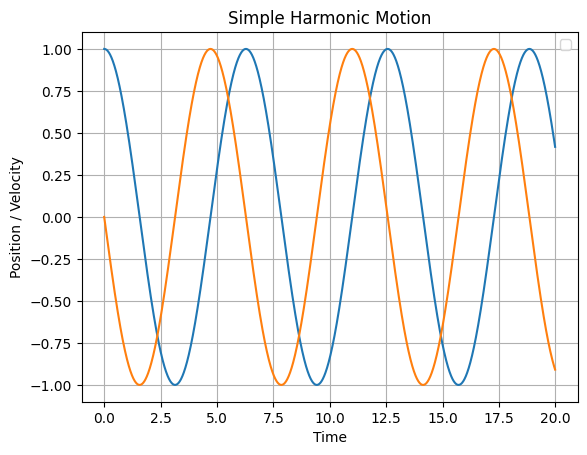

In [3]:
# visualize the results
plt.plot(t_span,sol[0])
plt.plot(t_span,sol[1])
plt.xlabel('Time')
plt.ylabel('Position / Velocity')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.grid(True)
plt.show()


# Damped Oscillation

When there is a damping force ($F_{\rm damp}=-\lambda \dot{x}$), the equation of motion becomes,

$$
m\ddot{x} + \lambda \dot{x} + kx = 0
$$

### Exercise

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a damped oscillator (from t=0 to 20). IC: at t=0, K=M=1, A=1, $\phi= 0$,$\lambda=0.2$.
* Make plots of position(t), velocity(t), and total energy (t). Comapred your results with analytical solutions.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


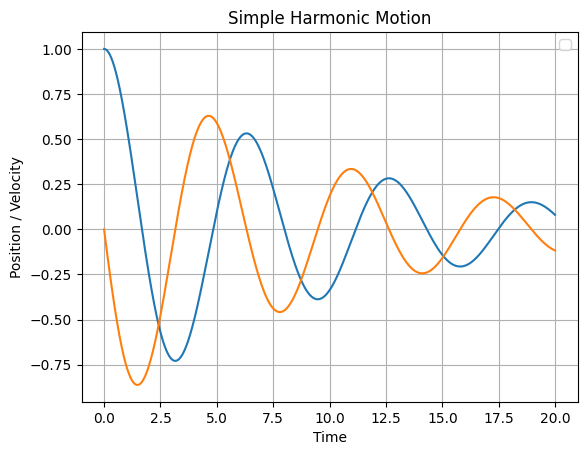

In [4]:
# TODO
L=0.2
args=[K,M,L]
sol=mysolver.solve_ivp(y_derivative,t_span,y,'RK4',t_eval,args)

plt.plot(t_span,sol[0])
plt.plot(t_span,sol[1])
plt.xlabel('Time')
plt.ylabel('Position / Velocity')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.grid(True)
plt.show()










### Analytical Solutions

The analytical solution is

$$
x(t) = A e^{-\gamma t} \left[\cos(\omega t + \phi) \right],
$$

where $\omega = \sqrt{\gamma^2 -\omega_0^2}$ or $\omega=\sqrt{\omega_0^2-\gamma^2}$.

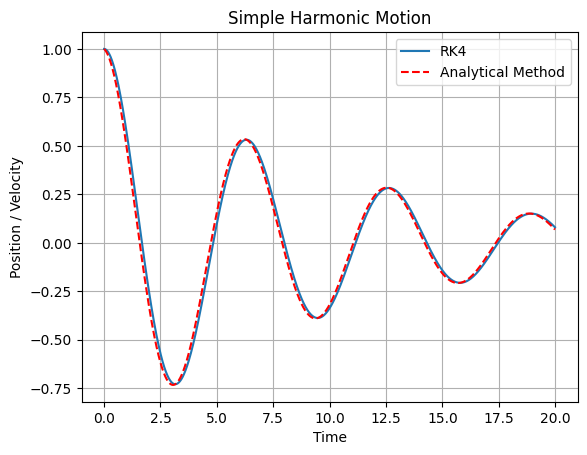

In [5]:
# Compute the analytical solution

def shm_analytical(tmax=20,dt=0.01,A=1,K=1,M=1,L=0.2):
    gamma=L/2/M
    omega0=np.sqrt(K/M)
    omega=np.sqrt(np.absolute(gamma**2-omega0**2))
    t=np.arange(0,tmax,dt)
    x=A*np.exp(-gamma*t)*(np.cos(omega*t))
    return t,x
t,x=shm_analytical()

plt.plot(t_span,sol[0],label='RK4')
plt.plot(t,x,'r--',label='Analytical Method')
plt.xlabel('Time')
plt.ylabel('Position / Velocity')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.grid(True)
plt.show()





## Part 2

Now, let's explore the evolution of the three general cases:

* Underdamping: $\omega_0^2 > \gamma^2$
* Critical damping: $\omega_0^2 = \gamma^2$
* Overdamping: $\omega_0^2 < \gamma^2$

Vary $\lambda$, to the corresponding conditions:
* $\lambda = 0.2$ ($\omega_0^2 > \gamma^2$)
* $\lambda = 2$ ($\omega_0^2 = \gamma^2$)
* $\lambda = 2.4$ ($\omega_0^2 < \gamma^2$)

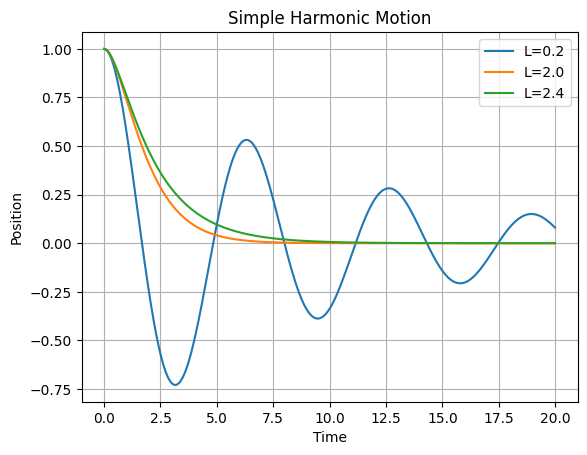

In [6]:
# TODO
L=0.2
args=[K,M,L]
sol=mysolver.solve_ivp(y_derivative,t_span,y,'RK4',t_eval,args)

plt.plot(t_span,sol[0],label='L=0.2')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Simple Harmonic Motion')

L=2.0
args=[K,M,L]
sol=mysolver.solve_ivp(y_derivative,t_span,y,'RK4',t_eval,args)

plt.plot(t_span,sol[0],label='L=2.0')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Simple Harmonic Motion')

L=2.4
args=[K,M,L]
sol=mysolver.solve_ivp(y_derivative,t_span,y,'RK4',t_eval,args)

plt.plot(t_span,sol[0],label='L=2.4')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.grid(True)
plt.show()






# Forced Oscillation

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a forced oscillator (from t=0 to 100).
* Set the inital conditions: A=1, K=M=1, $\lambda=0.2$, $F_0=0.1$ and $\omega_f=0.8$.
* Make plots of position(t), velocity(t), and total energy(t).

In [7]:
# TODO







# Resonance

* Resonance will happen when $\omega_0 = \omega_f$ without damping.
* Modify your `demo3` but set $\lambda=0$ and $\omega_f=1$.
* Re-run your simulation with $\lambda=0.1$ and $0.01$.


In [8]:
# TODO







# Using `scipy`

Compare the results of our solver (`mysolver`) with the `solve_ivp` in `scipy`.

In [9]:
# TODO







# Performance

We could mesure the performance of our solver and compare it with scipy.

In [10]:
#TODO







Which one is faster?